In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [33]:
def prepare_data(target):
    iris = load_iris()
    X_tr = iris.data[:, 2:] # 4개의 특징 중 꽃잎의 길이와 폭만 선택
    labels = iris.target_names # 'setosa', 'versicolor', 'virginica'
    y = iris.target

    # 학습 표본의 레이블 지정, target에 지정된 레이블이면 1, 아니면 0
    y_tr = []
    for i in range(150) :
        y_tr.append(labels[y[i]] == target)
    y_tr = np.array(y_tr, dtype=int)
    return X_tr, y_tr, ['(1) ' + target, '(0) the others']

In [34]:
def step(x):
    return int(x >= 0)

#### **퍼셉트론 클래스 선언**

In [35]:
class Perceptron():
    def __init__(self, dim, activation):
        rnd = np.random.default_rng()
        self.dim = dim
        self.activation = activation
        # 가중치와 바이어스를 He normal 방식으로 초기화
        self.w = rnd.normal(scale=np.sqrt(2.0/dim), size=dim)
        self.b = rnd.normal(scale=np.sqrt(2.0/dim))

    def printW(self) :
        for i in range(self.dim) :
            print('    w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
        print('    b = {:6.3f}'.format(self.b))

    def predict(self, x):
        return np.array([self.activation(np.dot(self.w, x[i]) + self.b) for i in range(len(x))])

    def fit(self, X, y, N, epochs, eta=0.01) :
        # 학습표본의 인덱스를 무작위 순서로 섞음
        idx = list(range(N))
        np.random.shuffle(idx)
        X = np.array([X[idx[i]] for i in range(N)])
        y = np.array([y[idx[i]] for i in range(N)])

        f = 'Epochs = {:4d}    Loss = {:8.5f}'
        print('w의 초깃값    ', end='')
        self.printW()
        for j in range(epochs) :
            for i in range(N) : 
                # x[i]에 대한 출력 오차 계산
                delta = self.predict([X[i]])[0] - y[i]
                self.w -= eta * delta * X[i]
                self.b -= eta * delta
            
            # 학습 과정 출력
            if j < 10 or (j+1) % 100 == 0:
                loss = self.predict(X) - y
                loss = (loss * loss).sum() / N
                print(f.format(j+1, loss), end='')
                self.printW()

In [36]:
def visualize(net, X, y, multi_class, labels, class_id, colors, xlabel, ylabel, legend_loc='lower_right') :
    x_max = np.ceil(np.max(X[:, 0])).astype(int)
    x_min = np.floor(np.min(X[:, 0])).astype(int)
    y_max = np.ceil(np.max(X[:, 1])).astype(int)
    y_min = np.floor(np.min(X[:, 1])).astype(int)
    x_lin = np.linspace(x_min, x_max, (x_max - x_min) * 20 + 1)
    y_lin = np.linspace(y_min, y_max, (y_max - y_min) * 20 + 1)

    # x_lin, y_lin의 격자좌표의 x와 y값 구하기
    x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)

    # (x, y) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])

    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = net.predict(X_test)
        y_hat = np.array([np.argmax(y_hat[k]) for k in range(len(y_hat))])
    else:
        y_hat = net.predict(X_test >= 0.5).astype(int)
        y_hat = y_hat.reshape(len(y_hat))
    
    # 출력할 그래프의 수평/수직 범위 및 각 클래스에 대한 색상 및 범례 설정
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # 클래스별로 산점도 그리기
    for c, i, c_name in zip(colors, labels, class_id) :
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1], c=c, s=5, alpha=0.3, edgecolors='none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y == i, 0], X[y == i, 1], c=c, s=20, label=c_name)

    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)

    # x축과 y축의 레이블 지정 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()


In [37]:
nSamples = 150
nDim = 2
target = 'setosa'
X_tr, y_tr, labels = prepare_data(target)

In [38]:
p = Perceptron(nDim, activation=step)
p.fit(X_tr, y_tr, nSamples, epochs=1000, eta=0.01)

w의 초깃값        w1 =  0.952    w2 = -0.494    b = -0.340
Epochs =    1    Loss =  0.24000    w1 =  0.253    w2 = -0.798    b = -0.210
Epochs =    2    Loss =  0.10667    w1 =  0.212    w2 = -0.821    b = -0.090
Epochs =    3    Loss =  0.06667    w1 =  0.198    w2 = -0.825    b = -0.020
Epochs =    4    Loss =  0.06667    w1 =  0.168    w2 = -0.830    b =  0.020
Epochs =    5    Loss =  0.05333    w1 =  0.154    w2 = -0.830    b =  0.050
Epochs =    6    Loss =  0.02667    w1 =  0.189    w2 = -0.817    b =  0.090
Epochs =    7    Loss =  0.02000    w1 =  0.179    w2 = -0.817    b =  0.100
Epochs =    8    Loss =  0.01333    w1 =  0.171    w2 = -0.816    b =  0.110
Epochs =    9    Loss =  0.01333    w1 =  0.163    w2 = -0.815    b =  0.120
Epochs =   10    Loss =  0.01333    w1 =  0.155    w2 = -0.814    b =  0.130
Epochs =  100    Loss =  0.00000    w1 =  0.109    w2 = -0.769    b =  0.300
Epochs =  200    Loss =  0.00000    w1 =  0.109    w2 = -0.769    b =  0.300
Epochs =  300    Loss

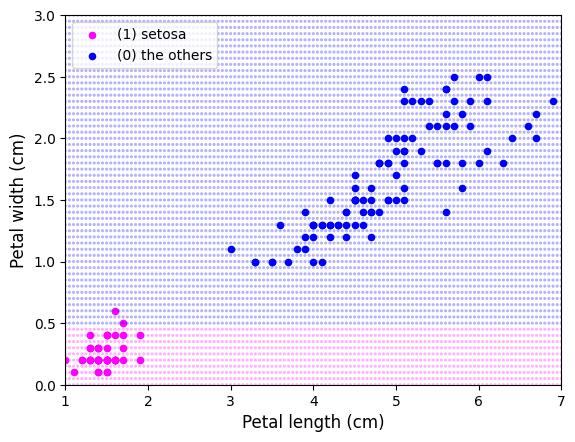

In [39]:
visualize(p, X_tr, y_tr,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='Petal length (cm)',
          ylabel='Petal width (cm)',
          legend_loc='upper left')